In [35]:
pip install pm4py


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
from os import sep
import pandas as pd
import numpy as np
import pm4py
from pm4py.objects.conversion.log import converter as log_converter

In [38]:
pip install converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
event_log_df =pd.read_csv("/content/Detail_Incident_Activity (1).csv", sep=';')
event_log_df =event_log_df.rename(columns={'Incident ID':'IncidentID'})

unique_inc_id_list = event_log_df.IncidentID.unique()

selected_inc_id_list =np.random.choice(unique_inc_id_list, size=1000,replace=False)


event_log_df_selected = event_log_df.loc[event_log_df['IncidentID'].isin(selected_inc_id_list)]

event_log_df_selected.head(10)

,IncidentID,DateStamp,IncidentActivity_Number,IncidentActivity_Type,Assignment Group,KM number,Interaction ID
96,IM0000017,13-02-2013 12:38:26,001A3970821,Update from customer,TEAM0002,KM0000611,SD0000036
97,IM0000017,08-11-2013 14:02:21,001A5891844,Caused By CI,TEAM0003,KM0000611,SD0000036
98,IM0000017,08-11-2013 14:02:21,001A5891843,Closed,TEAM0003,KM0000611,SD0000036
99,IM0000017,08-11-2013 13:53:47,001A5891809,Reassignment,TEAM0002,KM0000611,SD0000036
100,IM0000017,08-11-2013 13:53:47,001A5891810,Assignment,TEAM0002,KM0000611,SD0000036
101,IM0000017,08-11-2013 13:53:47,001A5891811,Update from customer,TEAM0002,KM0000611,SD0000036
1191,IM0000075,10-04-2013 13:22:17,001A4380961,Resolved,TEAM0029,KM0000741,#N/B
1192,IM0000075,30-12-2013 10:36:45,001A6260864,Closed,TEAM0029,KM0000741,#N/B
1193,IM0000075,27-03-2013 13:06:47,001A4289916,Reassignment,TEAM0023,KM0000741,#N/B
1194,IM0000075,08-04-2013 13:28:23,001A4359838,Reassignment,TEAM0030,KM0000741,#N/B


# New Section

In [51]:
event_log_df_selected.rename(columns={'DateStamp':'time:timestamp',
                                      'IncidentID':'case:concept:name',
                                      'IncidentActivity_Type':'concept:name',
                                      'Assignment Group':'org:resource'},inplace=True)

log_to_process = log_converter.apply(event_log_df_selected)

<ipython-input-51-76ba1fa1ef1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_log_df_selected.rename(columns={'DateStamp':'time:timestamp',


In [52]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

from pm4py.visualization.petri_net import visualizer as pn_visualizer

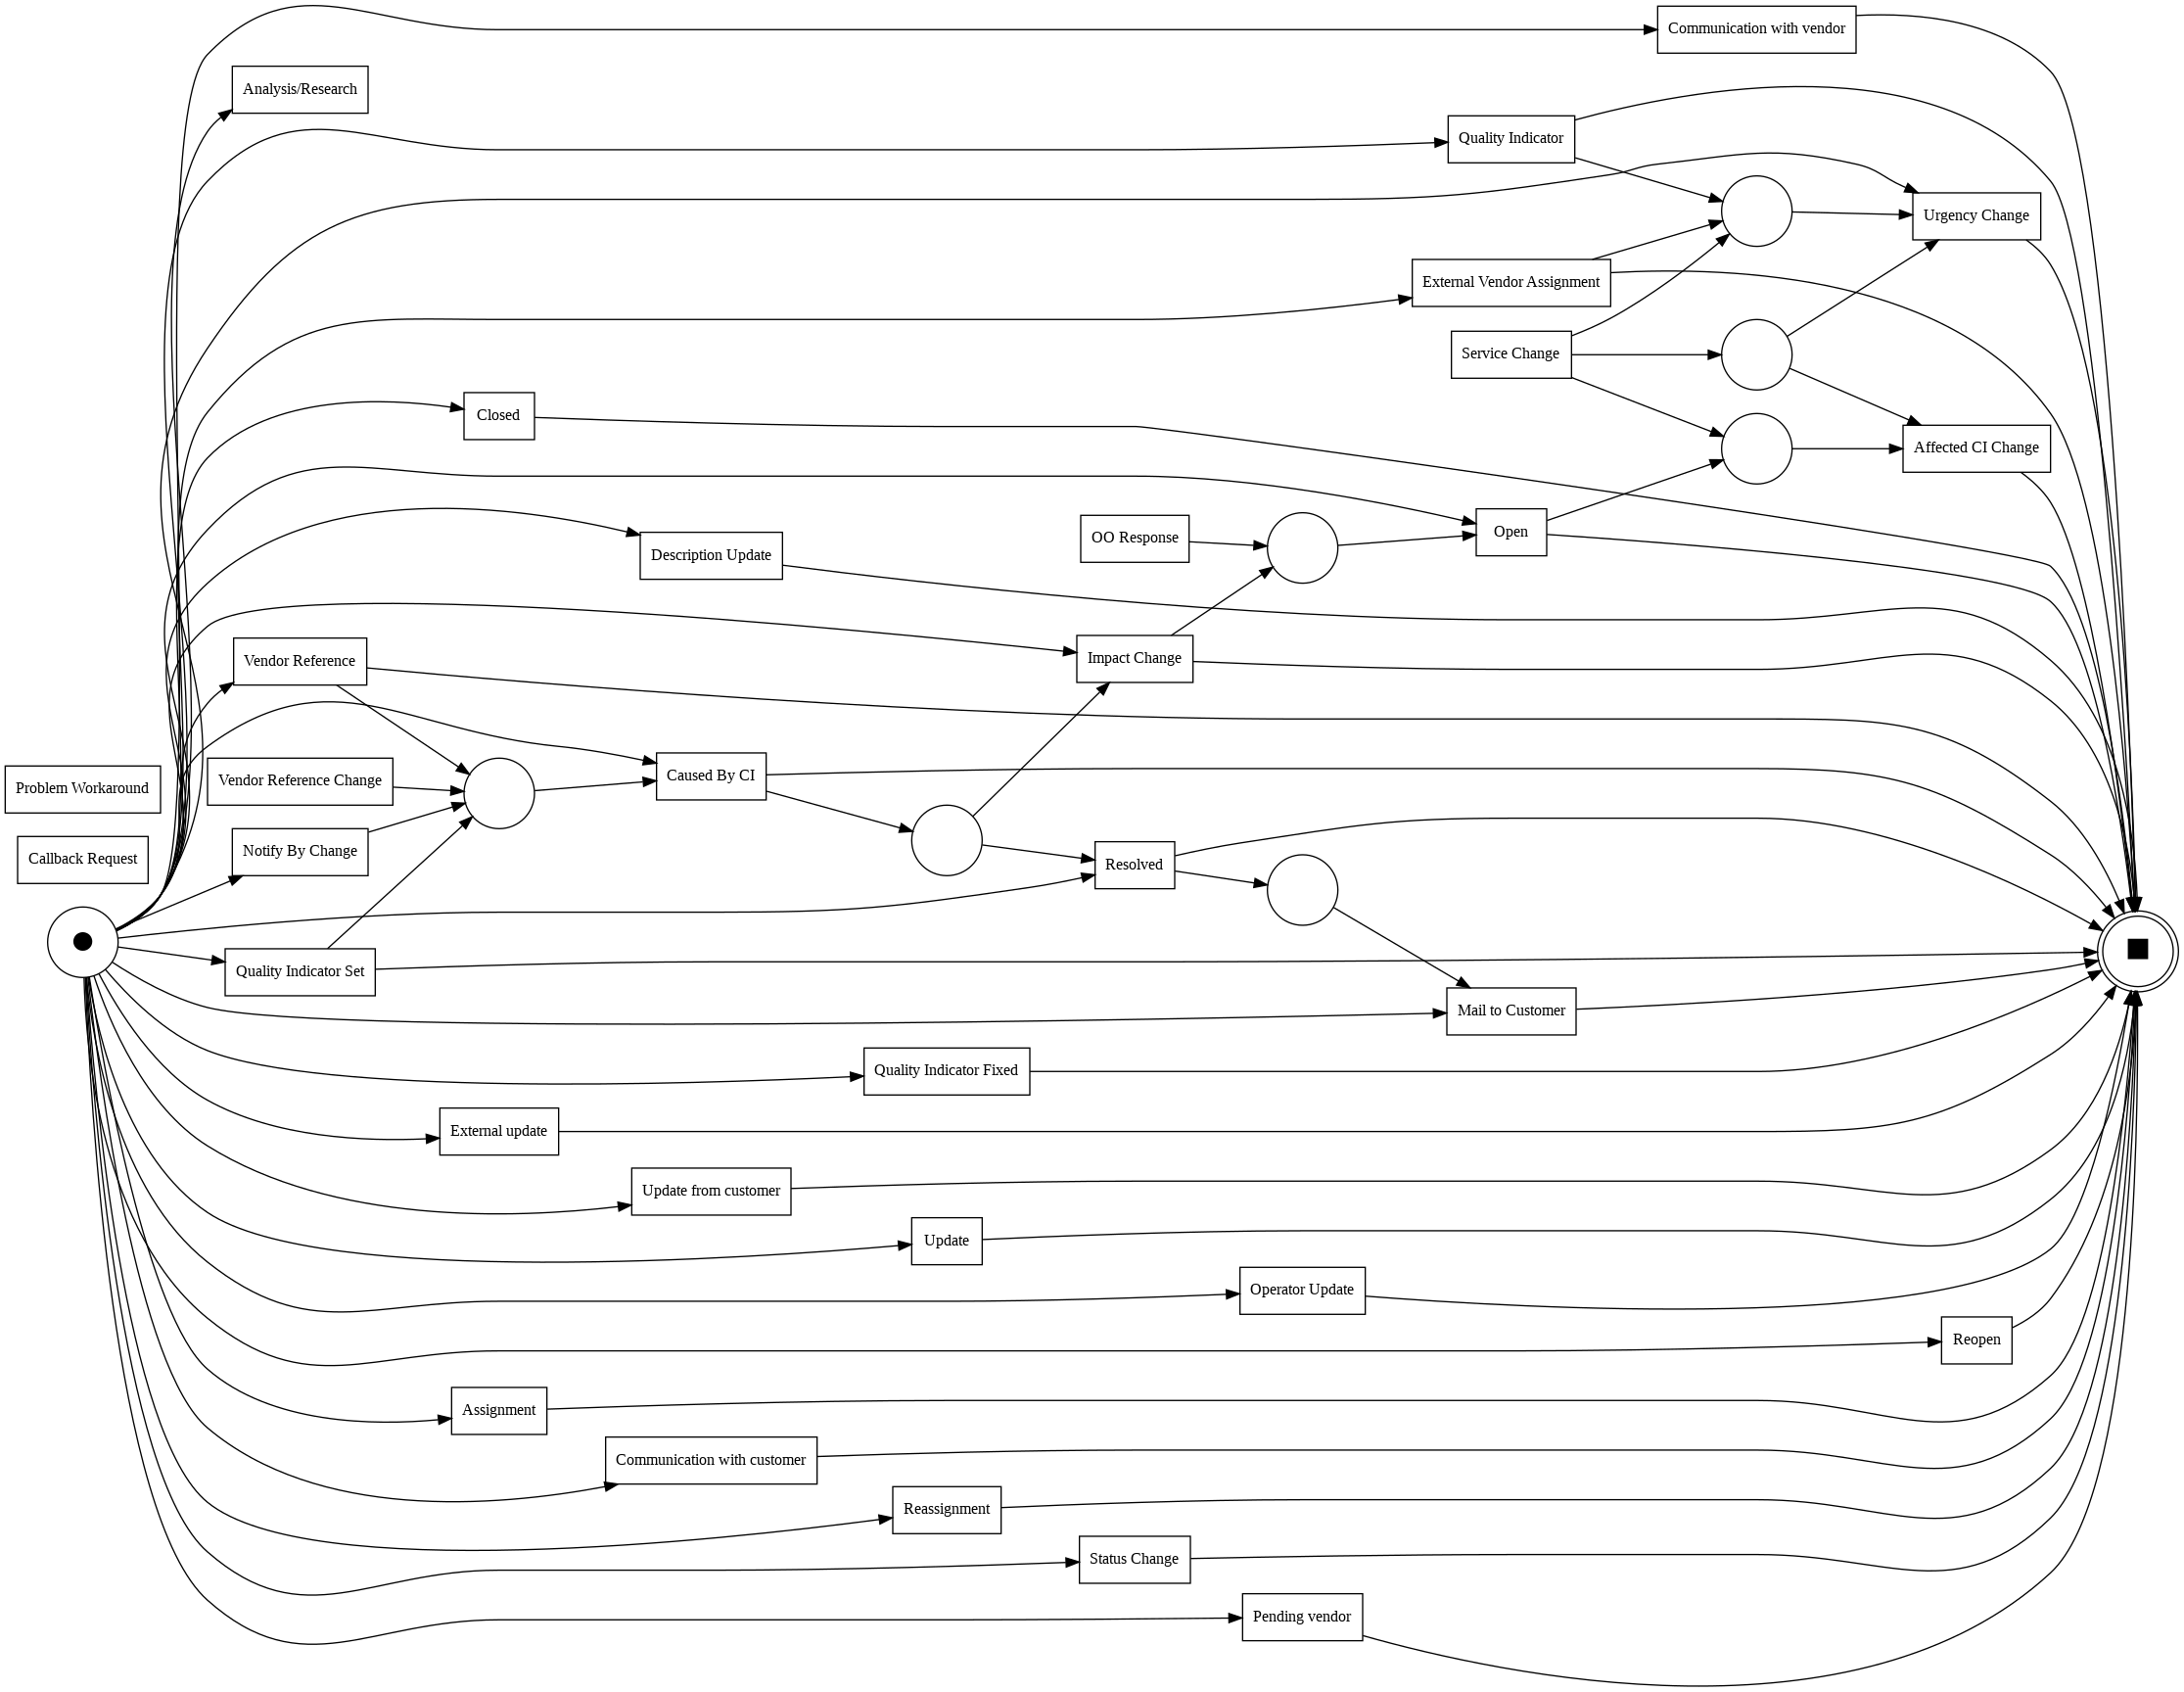

In [53]:
net, initial_marking, final_marking = alpha_miner.apply(log_to_process)

gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)


/usr/local/lib/python3.9/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


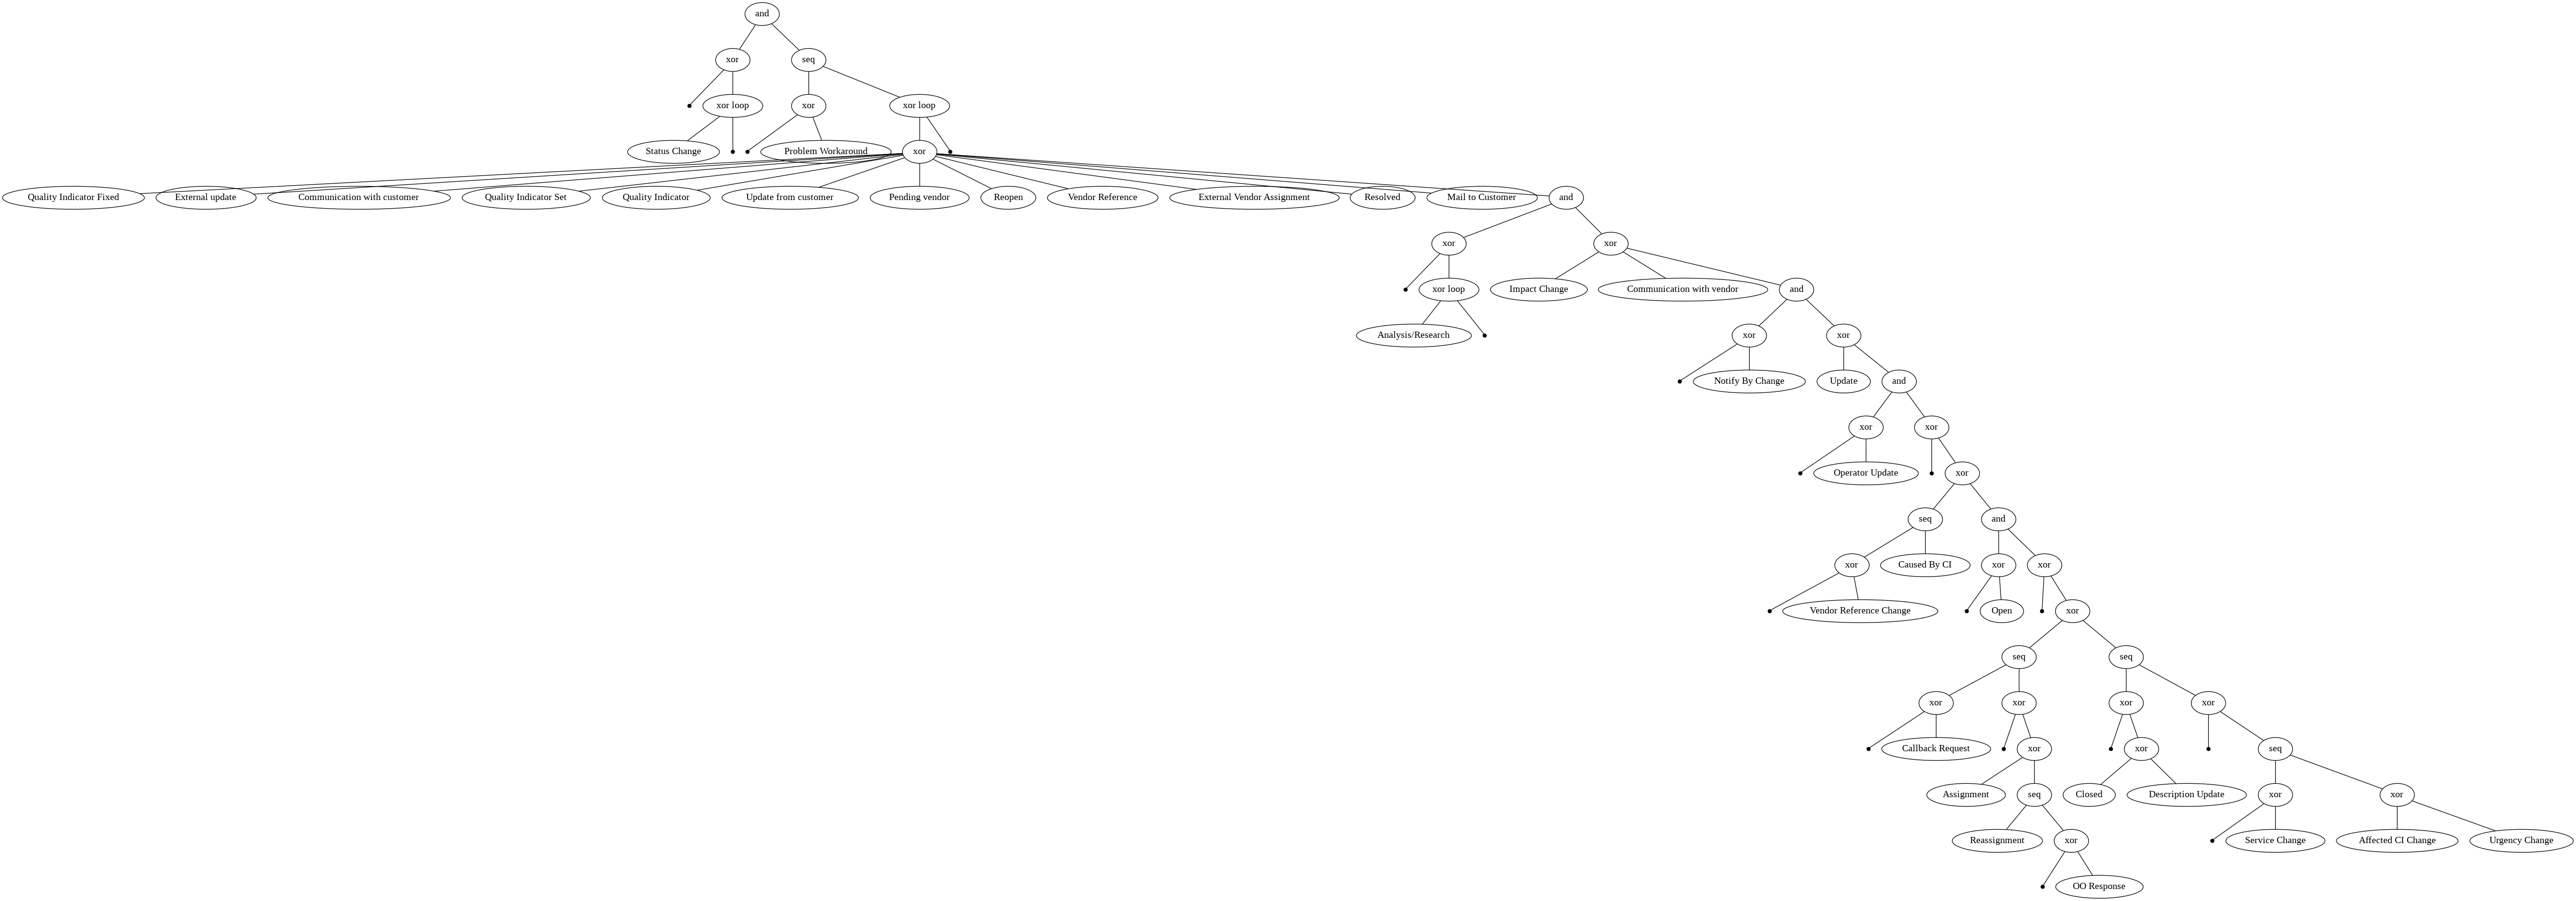

In [54]:
tree =pm4py.discover_process_tree_inductive(log_to_process)
pm4py.view_process_tree(tree)

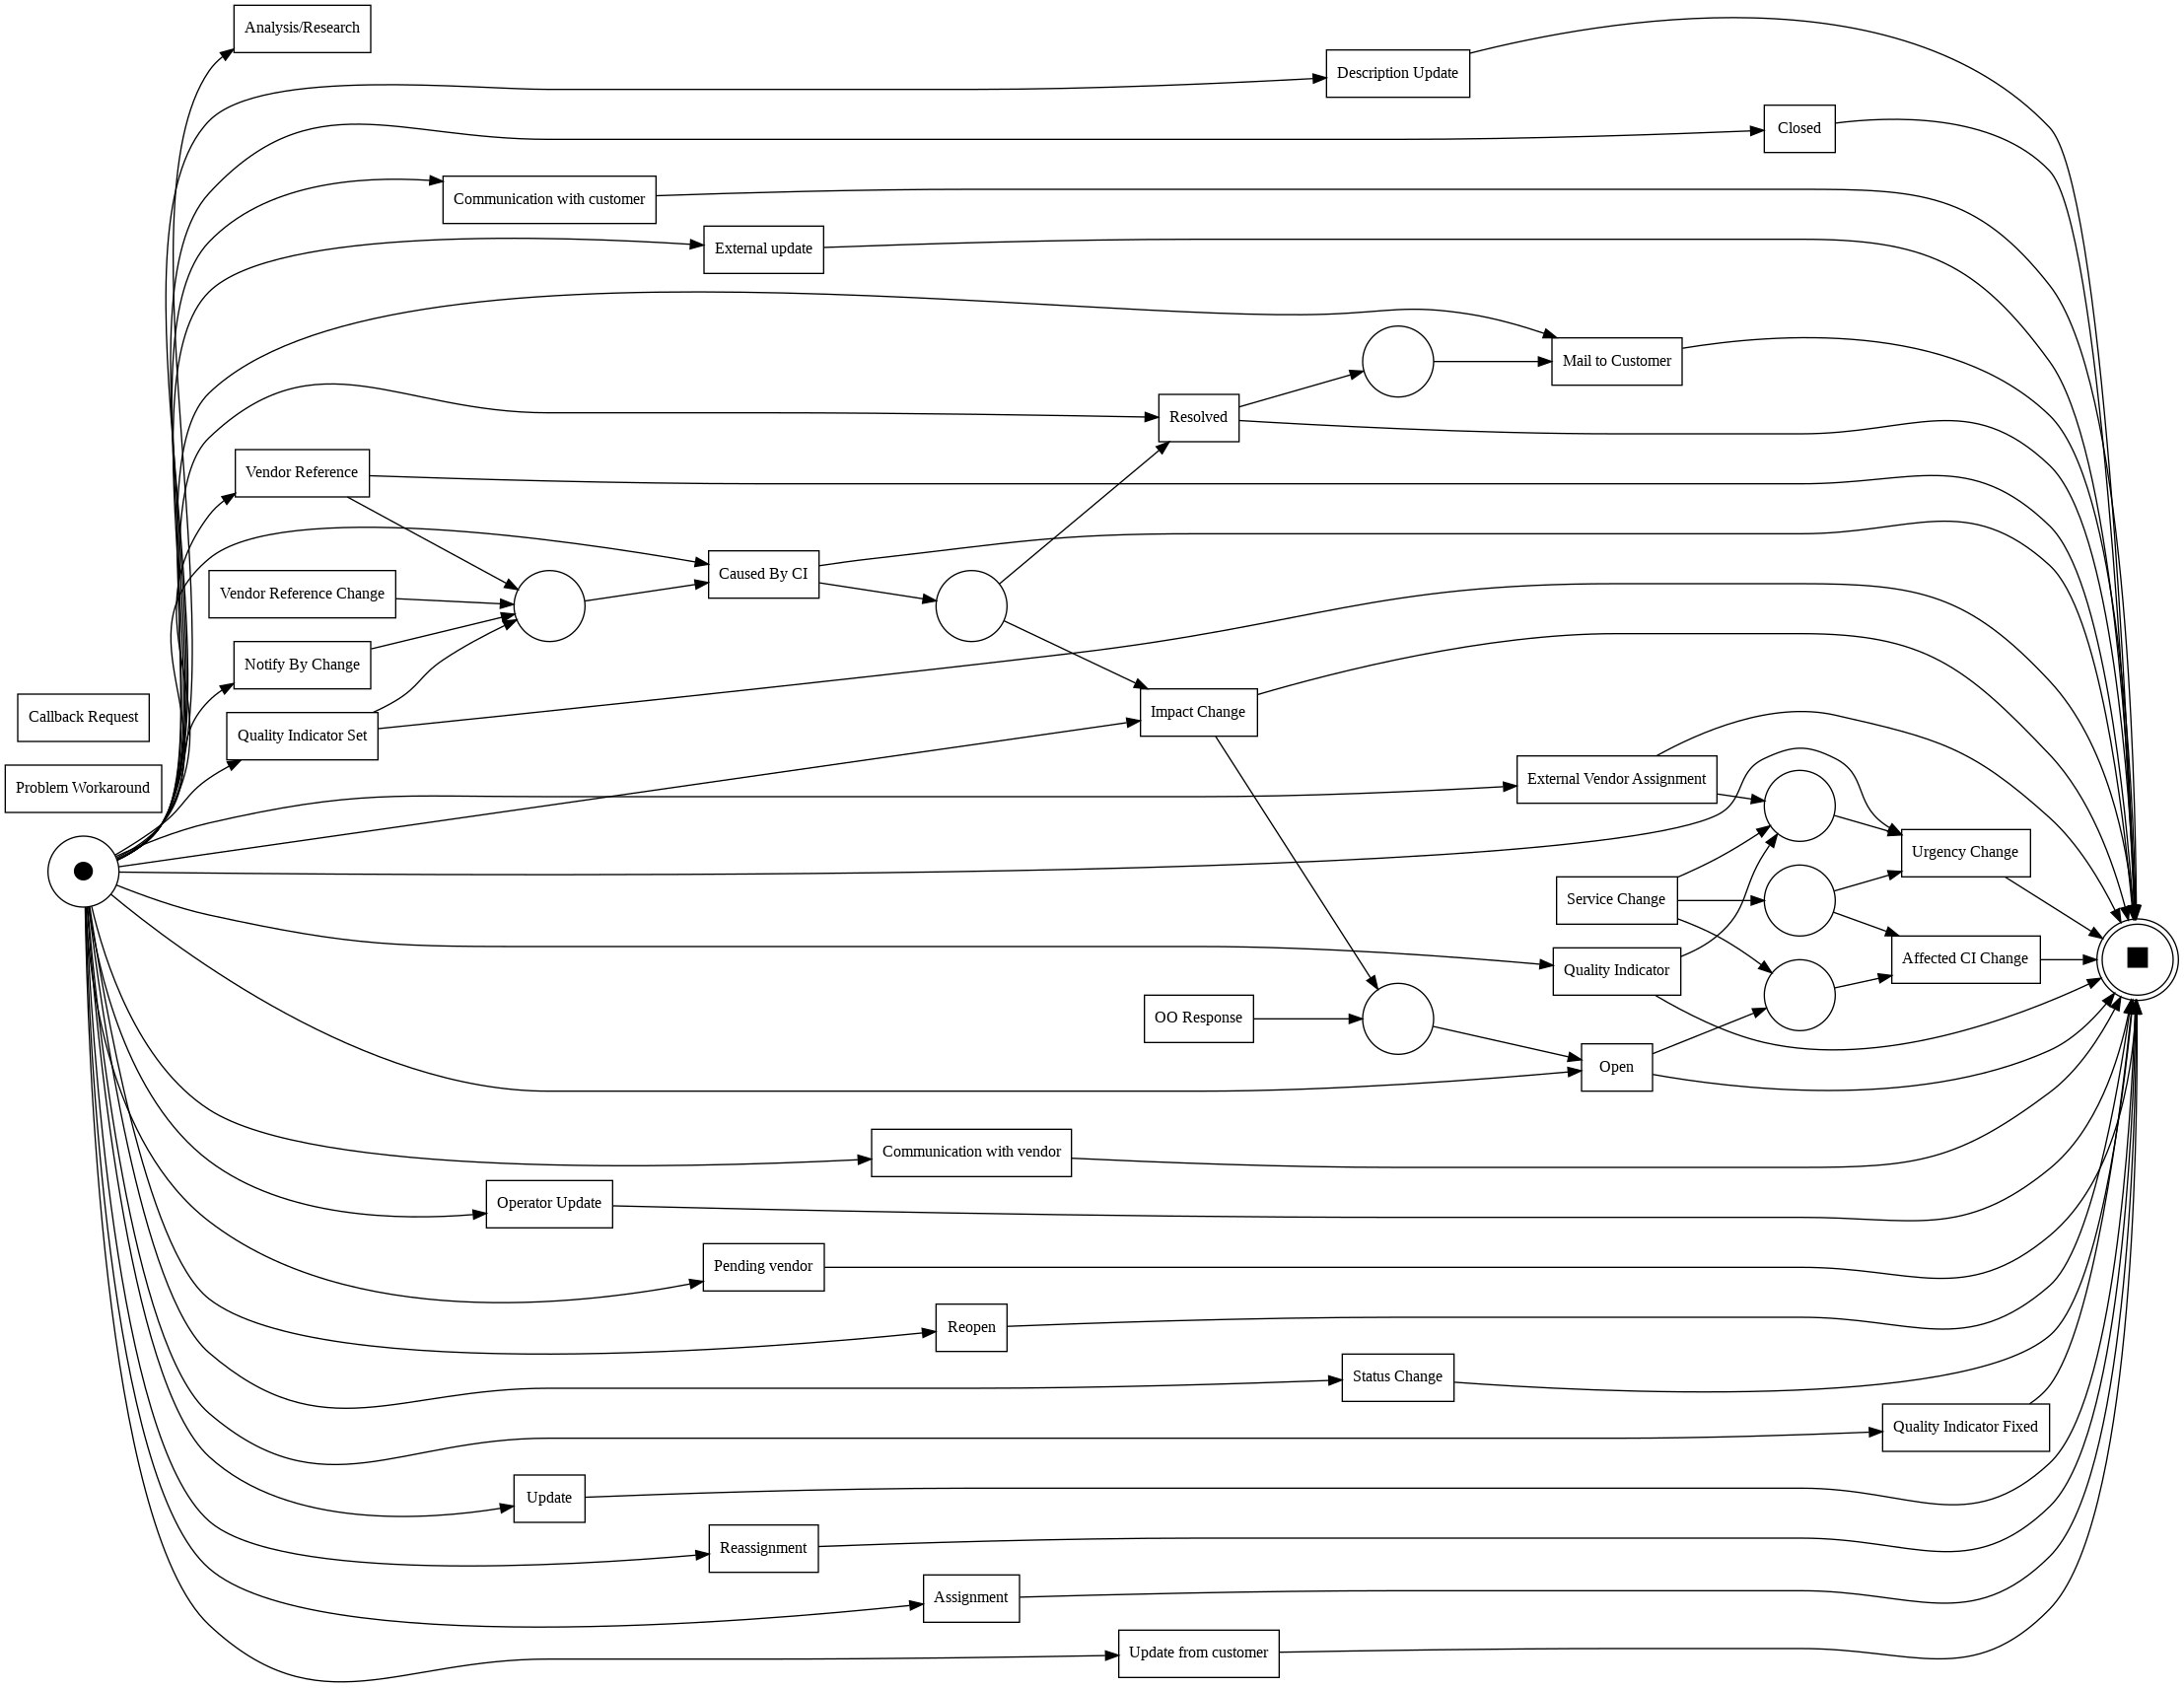

In [56]:
net_2, initial_marking_2, final_marking_2 = alpha_miner.apply(log_to_process)

gviz_2 = pn_visualizer.apply(net_2, initial_marking_2, final_marking_2)
pn_visualizer.view(gviz_2)
